**Import Statements**

In [0]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import pprint

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.patheffects as path_effects

import librosa

**Loading mnist data**

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

**Training data shape**

In [3]:
mnist.train.images.shape

(55000, 784)

**Setting up placeholders**

In [0]:
# placeholders

train_x = tf.placeholder(tf.float32,[None, 784])
train_y = tf.placeholder(tf.float32,[None, 10])


**Training Model**

In [0]:
# model

with tf.variable_scope("other_charge", reuse=tf.AUTO_REUSE) as scope:


  weight1=tf.get_variable("Weights1",[784, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias1=tf.Variable(tf.zeros([1024]))

  weight2=tf.get_variable("Weights2",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias2=tf.Variable(tf.zeros([1024]))

  weight3=tf.get_variable("Weights3",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias3=tf.Variable(tf.zeros([1024]))

  weight4=tf.get_variable("Weights4",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias4=tf.Variable(tf.zeros([1024]))

  weight5=tf.get_variable("Weights5",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias5=tf.Variable(tf.zeros([1024]))

  weight6=tf.get_variable("Weights6",[1024, 10],initializer=tf.contrib.layers.xavier_initializer())
  bias6=tf.Variable(tf.zeros([10]))

  hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(train_x, weight1), bias1))
  hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, weight2), bias2))
  hidden_layer3 = tf.nn.relu(tf.add(tf.matmul(hidden_layer2, weight3), bias3))
  hidden_layer4 = tf.nn.relu(tf.add(tf.matmul(hidden_layer3, weight4), bias4))
  hidden_layer5 = tf.nn.relu(tf.add(tf.matmul(hidden_layer4, weight5), bias5))
  output_layer = tf.matmul(hidden_layer5, weight6)+bias6
  #last layer prob

  err = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=train_y,logits=output_layer))
  optimize = tf.train.AdamOptimizer().minimize(err)
  correct = tf.equal(tf.argmax(output_layer, 1), tf.argmax(train_y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  prob_predict=tf.nn.softmax(output_layer)
  
num_epochs = 50
batch_size = 156
  




**To choose 1000 random test images**

In [0]:

from random import sample
sampl=sample([i for i in range(len(mnist.test.images))],1000)


**Running for epochs and checking loss**

In [7]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())


  for iter in range(num_epochs):

    loss = 0

    n_batch=int(mnist.train.num_examples/batch_size)

    for batch in range(n_batch):
      
      batch_x,batch_y = mnist.train.next_batch(batch_size)
      o,e = sess.run([optimize,err], feed_dict={train_x: batch_x, train_y: batch_y})

      loss+=e/n_batch

    
    s="epoch num - "+ str(iter) +": Loss is - "+ str(round(loss,2))
    print(s)

  print(sess.run(accuracy, feed_dict={train_x: mnist.test.images, train_y: mnist.test.labels}))
  probabilities_output=sess.run(prob_predict,feed_dict={train_x: mnist.test.images[sampl,:]})
  hiddenlayer5=sess.run(hidden_layer5,feed_dict={train_x: mnist.test.images[sampl,:]})
  hiddenlayer1=sess.run(hidden_layer1,feed_dict={train_x: mnist.test.images[sampl,:]})
  hiddenlayer2=sess.run(hidden_layer2,feed_dict={train_x: mnist.test.images[sampl,:]})
  hiddenlayer3=sess.run(hidden_layer3,feed_dict={train_x: mnist.test.images[sampl,:]})
  hiddenlayer4=sess.run(hidden_layer4,feed_dict={train_x: mnist.test.images[sampl,:]})
  outputlayer=sess.run(output_layer,feed_dict={train_x: mnist.test.images[sampl,:]})


epoch num - 0: Loss is - 0.24
epoch num - 1: Loss is - 0.1
epoch num - 2: Loss is - 0.07
epoch num - 3: Loss is - 0.05
epoch num - 4: Loss is - 0.04
epoch num - 5: Loss is - 0.04
epoch num - 6: Loss is - 0.04
epoch num - 7: Loss is - 0.03
epoch num - 8: Loss is - 0.03
epoch num - 9: Loss is - 0.02
epoch num - 10: Loss is - 0.03
epoch num - 11: Loss is - 0.03
epoch num - 12: Loss is - 0.02
epoch num - 13: Loss is - 0.02
epoch num - 14: Loss is - 0.01
epoch num - 15: Loss is - 0.02
epoch num - 16: Loss is - 0.02
epoch num - 17: Loss is - 0.02
epoch num - 18: Loss is - 0.01
epoch num - 19: Loss is - 0.01
epoch num - 20: Loss is - 0.01
epoch num - 21: Loss is - 0.01
epoch num - 22: Loss is - 0.02
epoch num - 23: Loss is - 0.01
epoch num - 24: Loss is - 0.01
epoch num - 25: Loss is - 0.01
epoch num - 26: Loss is - 0.02
epoch num - 27: Loss is - 0.01
epoch num - 28: Loss is - 0.01
epoch num - 29: Loss is - 0.01
epoch num - 30: Loss is - 0.01
epoch num - 31: Loss is - 0.01
epoch num - 32: Los

**Q1.3: create  a  10×10  grid  of  subplots from output layer**

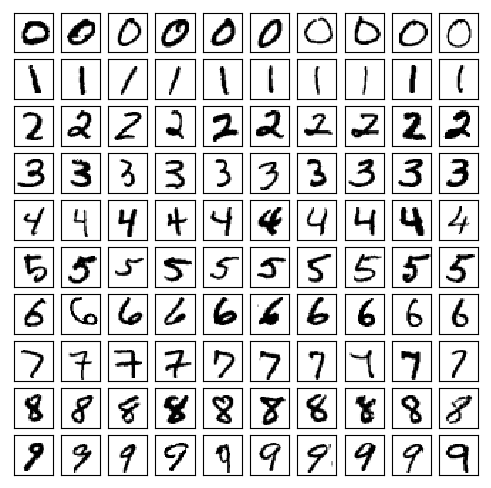

In [8]:
prob_out = pd.DataFrame(probabilities_output, columns=[0,1,2,3,4,5,6,7,8,9])

maxprob_ind = prob_out.idxmax(axis=1)
maxprob = prob_out.max(axis=1)
prob_df = pd.DataFrame(maxprob_ind, columns=["max_prob_ind"])
prob_df["images"] = sampl
prob_df["max_prob"] = maxprob
prob_df=prob_df.sort_values(['max_prob_ind', 'max_prob'], ascending=[True, False]).reset_index()
result = []
k=0
j=0
for k in range(10):
  select_indices = list(np.where(prob_df["max_prob_ind"] == k))
  for i in select_indices[0][:10]: 
    result.append([prob_df.max_prob_ind[i],prob_df.images[i]])


result_mat = pd.DataFrame(result, columns=["label","image_ind"])
plt.figure(figsize=(6,6))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(mnist.test.images[result_mat.image_ind[i]].reshape([28,28]), cmap=plt.cm.binary)
plt.show()

**Choosing random 10 dimensions**

In [39]:
import random 
  
random.seed(8)
sampl_dim=sample([i for i in range(len(hiddenlayer5[0]))],10)
hidden_layer=hiddenlayer5[:,sampl_dim]
hidden_layer.shape

(1000, 10)

**Q1.4: create  a  10×10  grid  of  subplots from last but one layer**

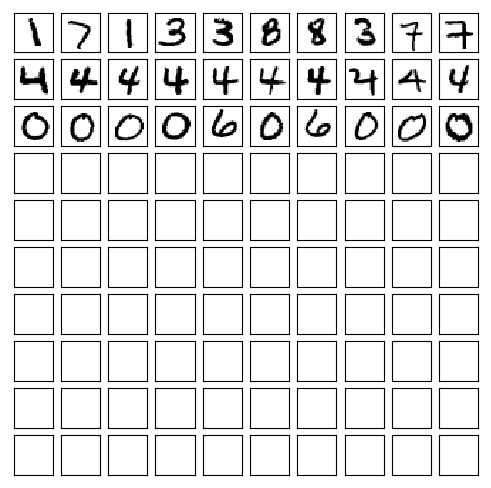

In [40]:

prob_out = pd.DataFrame(hidden_layer, columns=[0,1,2,3,4,5,6,7,8,9])

maxprob_ind = prob_out.idxmax(axis=1)
maxprob = prob_out.max(axis=1)
prob_df = pd.DataFrame(maxprob_ind, columns=["max_prob_ind"])
prob_df["images"] = sampl
prob_df["max_prob"] = maxprob
prob_df=prob_df.sort_values(['max_prob_ind', 'max_prob'], ascending=[True, False]).reset_index()
result = []
k=0
j=0

for k in range(10):
  select_indices = list(np.where(prob_df["max_prob_ind"] == k))
  if len(select_indices[0]) >= 10:
  #print(select_indices[0][:10])
    s = select_indices[0][:10]
    for i in range(10):
        result.append([prob_df.max_prob_ind[s[i]],prob_df.images[s[i]]])
  else:
    x = len(select_indices[0])
    rem = 10-x
    s = select_indices[0]
    i=0
    while x > 0:
      result.append([prob_df.max_prob_ind[s[i]],prob_df.images[s[i]]])
      x-=1
      i+=1
    for i in range(rem):
      result.append([-100,-100])

result_mat = pd.DataFrame(result, columns=["label","image_ind"])
plt.figure(figsize=(6,6))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  if result_mat.image_ind[i] == -100:
    #print(result_mat[i])
    npArray = np.array([[[0, 0, 0, 0]]])
    plt.imshow(npArray)
  else:
    plt.imshow(mnist.test.images[result_mat.image_ind[i]].reshape([28,28]), cmap=plt.cm.binary)
plt.show()


**Question:**

Explain your observation compared with the results from 1.3.  What can you  see?   What  would  have  been  the  ideal  situation  for  this  second-to-the-last layer?  Feel free to investigate the other layers if you want, but I wouldn’t care because we have a better way.

**Observation:**

The above image represents the output from second-to-last layer from which it is evident that images are not classified well. That is because the output from the layer is of 1024 dimensions and we have used random 10 dimensions to represent 10 classes. Ideally they will not be the correct combination of 10 classes. Ideally all images in each row should belong to the same class but it is not as seen above.




**Q1.5 and 1.6: PCA & tSNE on random 1000 test images**

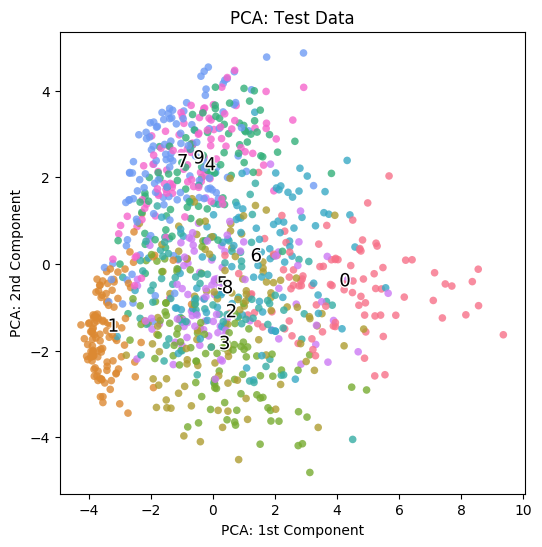

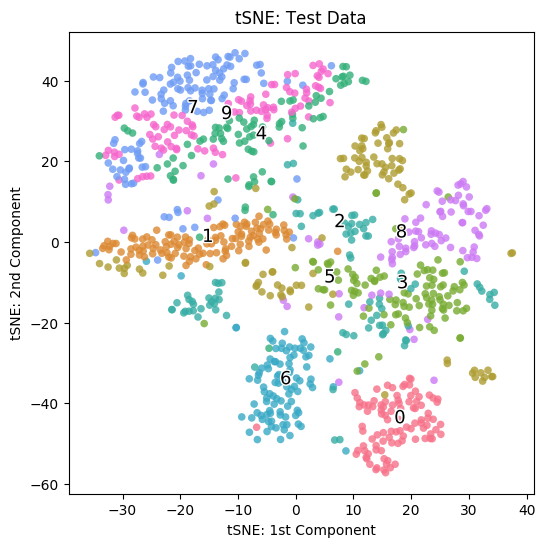

In [11]:
#PCA

pca = PCA(n_components=2)
pca_test_img = pca.fit_transform(mnist.test.images[sampl,:])
pca_test_labels = mnist.test.labels[sampl,:]
labels = pd.DataFrame(pca_test_labels,columns=[0,1,2,3,4,5,6,7,8,9])
labels=[i for i in labels.idxmax(axis=1)]
pca_test_img=pd.DataFrame(pca_test_img,columns = ["pca_1","pca_2"])
pca_test_img["labels"]=labels


def plot_class(pca_test_img):
  num_classes = len(np.unique(pca_test_img.labels))
  palette = np.array(sns.color_palette("husl", num_classes))
  fig = plt.figure(figsize=(6,6))
  plt.scatter(pca_test_img["pca_1"], pca_test_img["pca_2"], lw=0, s=30, c=palette[pca_test_img.labels],alpha=0.8)
  plt.xlabel("PCA: 1st Component")
  plt.ylabel("PCA: 2nd Component")
  plt.title("PCA: Test Data")

 
  for i in range(num_classes):
    x_label = np.mean(pca_test_img[pca_test_img.labels == i]["pca_1"])
    y_label = np.mean(pca_test_img[pca_test_img.labels == i]["pca_2"])
    mean_label = plt.text(x_label, y_label, str(i), fontsize=13)
    mean_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground="w"),path_effects.Normal()])


plot_class(pca_test_img)


#tSNE

tSNE = TSNE(n_components=2)
tSNE_test_img = tSNE.fit_transform(mnist.test.images[sampl,:])
tSNE_test_labels = mnist.test.labels[sampl,:]
labels_tSNE = pd.DataFrame(tSNE_test_labels,columns=[0,1,2,3,4,5,6,7,8,9])
labels_tSNE=[i for i in labels_tSNE.idxmax(axis=1)]
tSNE_test_img=pd.DataFrame(tSNE_test_img,columns = ["tSNE_1","tSNE_2"])
tSNE_test_img["labels"]=labels

def plot_class(tSNE_test_img):
  num_classes = len(np.unique(tSNE_test_img.labels))
  palette = np.array(sns.color_palette("husl", num_classes))
  fig = plt.figure(figsize=(6,6))
  plt.scatter(tSNE_test_img["tSNE_1"], tSNE_test_img["tSNE_2"], lw=0, s=30, c=palette[tSNE_test_img.labels],alpha=0.8)
  plt.xlabel("tSNE: 1st Component")
  plt.ylabel("tSNE: 2nd Component")
  plt.title("tSNE: Test Data")

  for i in range(num_classes):
    x_label = np.mean(tSNE_test_img[tSNE_test_img.labels == i]["tSNE_1"])
    y_label = np.mean(tSNE_test_img[tSNE_test_img.labels == i]["tSNE_2"])
    mean_label = plt.text(x_label, y_label, str(i), fontsize=13)
    mean_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground="w"),path_effects.Normal()])


plot_class(tSNE_test_img)

**Question:**

Do you think this raw image samples are easy to classify?

**Observation:**

The raw image samples are definitely not easy to classify. As there is not a defined pattern. Components from tSNE although show a better contrast among classes but PCA has a very poor distinguishing power and is not easy to classify images.

**Creating function for plotting inner layer**

In [0]:


#PCA

def plot_class_layer_pca(layer,s):
  img = pca.fit_transform(layer)
  labels = pd.DataFrame(pca_test_labels,columns=[0,1,2,3,4,5,6,7,8,9])
  labels=[i for i in labels.idxmax(axis=1)]
  img=pd.DataFrame(img,columns = ["pca_1","pca_2"])
  img["labels"]=labels
  
  num_classes = len(np.unique(img.labels))
  palette = np.array(sns.color_palette("husl", num_classes))
  fig = plt.figure(figsize=(6,6))
  plt.scatter(img["pca_1"], img["pca_2"], lw=0, s=30, c=palette[img.labels],alpha=0.8)
  plt.xlabel("PCA: 1st Component")
  plt.ylabel("PCA: 2nd Component")
  plt.title("PCA: "+s)

 
  for i in range(num_classes):
    x_label = np.mean(img[img.labels == i]["pca_1"])
    y_label = np.mean(img[img.labels == i]["pca_2"])
    mean_label = plt.text(x_label, y_label, str(i), fontsize=13)
    mean_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground="w"),path_effects.Normal()])





#tSNE

def plot_class_layer_tSNE(layer,s):
  img = tSNE.fit_transform(layer)
  labels = pd.DataFrame(tSNE_test_labels,columns=[0,1,2,3,4,5,6,7,8,9])
  labels=[i for i in labels.idxmax(axis=1)]
  img=pd.DataFrame(img,columns = ["tSNE_1","tSNE_2"])
  img["labels"]=labels
  
  num_classes = len(np.unique(img.labels))
  palette = np.array(sns.color_palette("husl", num_classes))
  fig = plt.figure(figsize=(6,6))
  plt.scatter(img["tSNE_1"], img["tSNE_2"], lw=0, s=30, c=palette[img.labels],alpha=0.8)
  plt.xlabel("tSNE: 1st Component")
  plt.ylabel("tSNE: 2nd Component")
  plt.title("tSNE: "+s)

 
  for i in range(num_classes):
    x_label = np.mean(img[img.labels == i]["tSNE_1"])
    y_label = np.mean(img[img.labels == i]["tSNE_2"])
    mean_label = plt.text(x_label, y_label, str(i), fontsize=13)
    mean_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground="w"),path_effects.Normal()])

**Q1.7: Plot from 1st Hidden Layers**

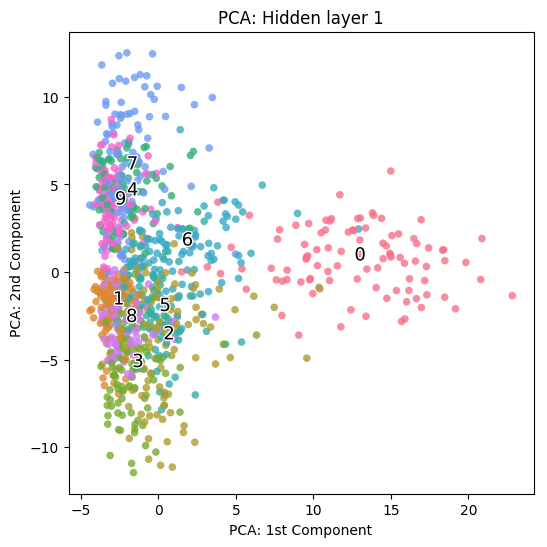

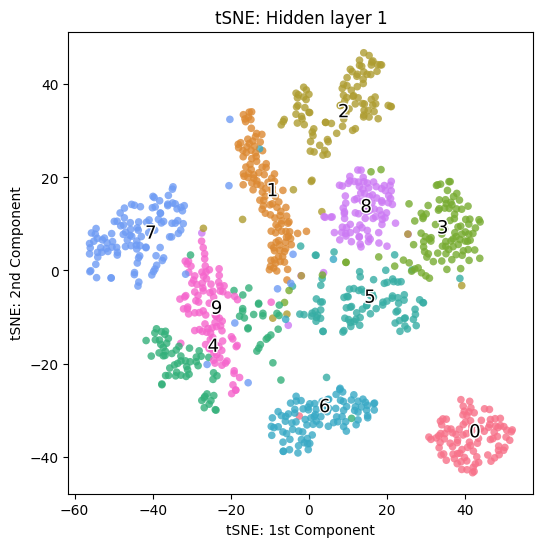

In [13]:
plot_class_layer_pca(hiddenlayer1,"Hidden layer 1")
plot_class_layer_tSNE(hiddenlayer1,"Hidden layer 1")

**Q1.8 Plot from other hidden layers**

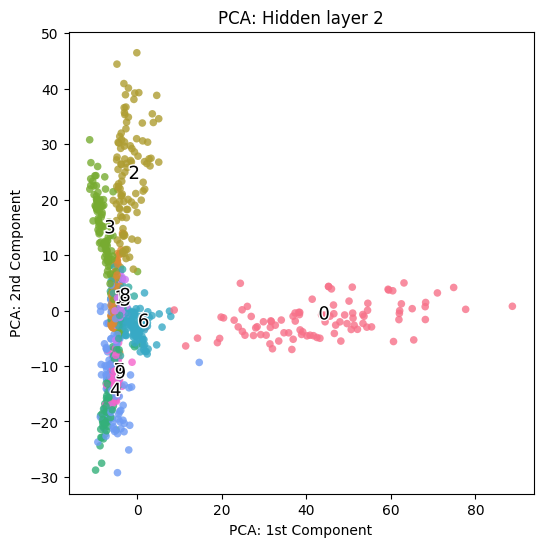

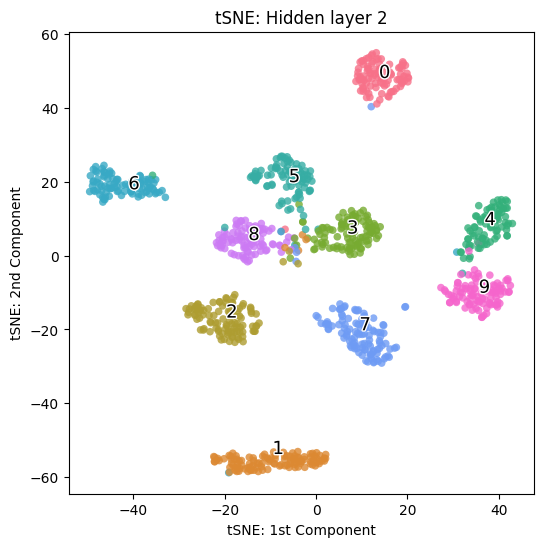

In [14]:
plot_class_layer_pca(hiddenlayer2,"Hidden layer 2")
plot_class_layer_tSNE(hiddenlayer2,"Hidden layer 2")

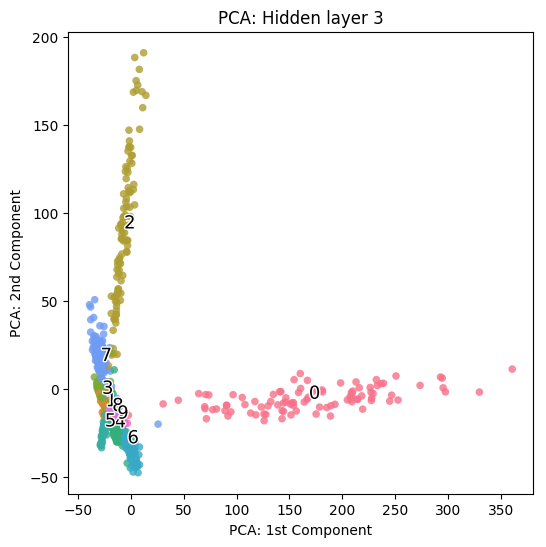

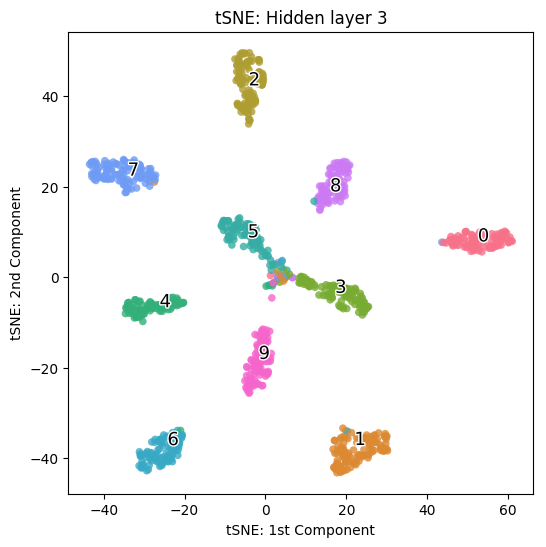

In [15]:
plot_class_layer_pca(hiddenlayer3,"Hidden layer 3")
plot_class_layer_tSNE(hiddenlayer3,"Hidden layer 3")

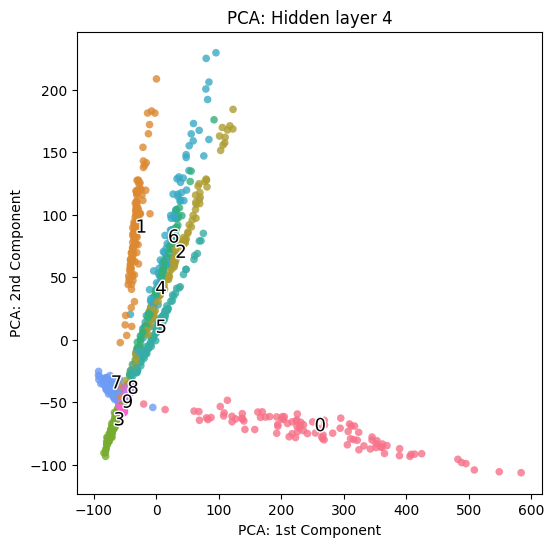

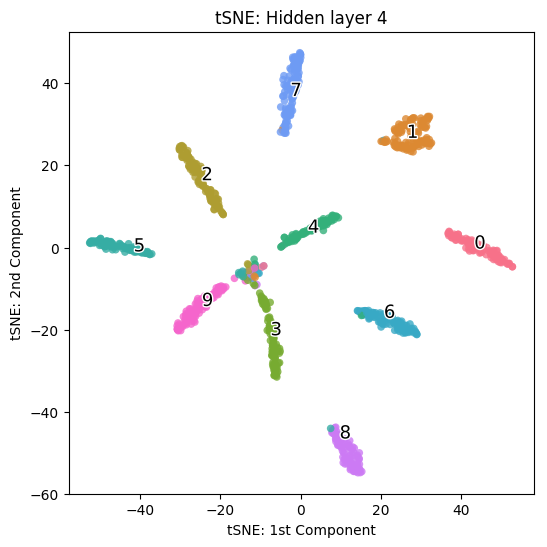

In [16]:
plot_class_layer_pca(hiddenlayer4,"Hidden layer 4")
plot_class_layer_tSNE(hiddenlayer4,"Hidden layer 4")

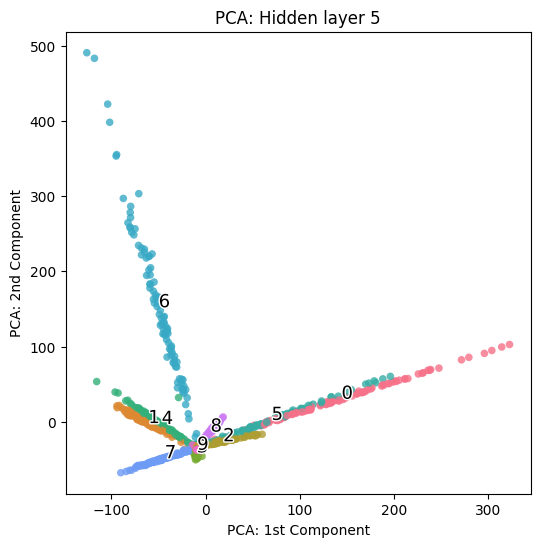

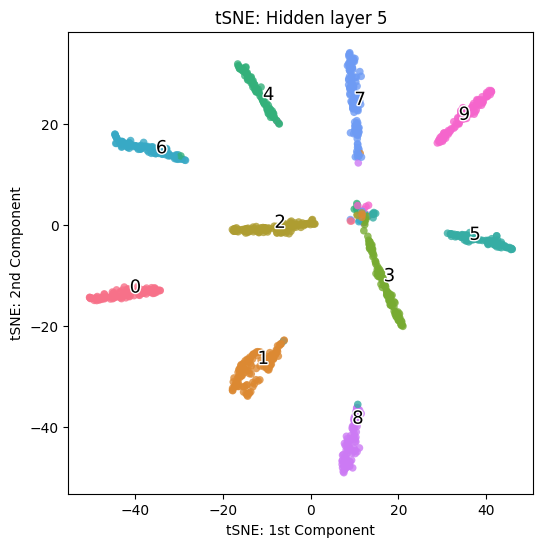

In [17]:
plot_class_layer_pca(hiddenlayer5,"Hidden layer 5")
plot_class_layer_tSNE(hiddenlayer5,"Hidden layer 5")

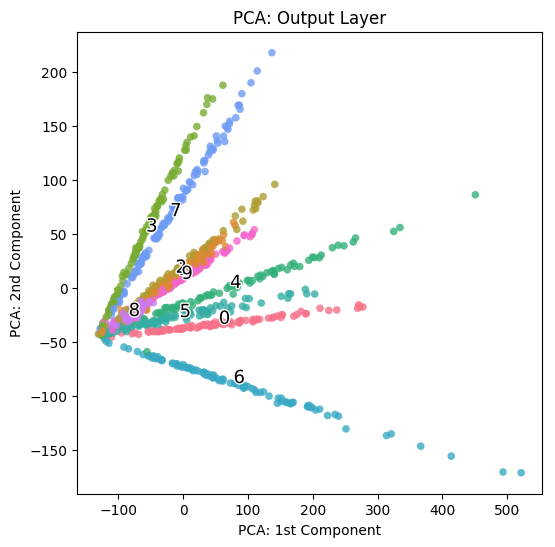

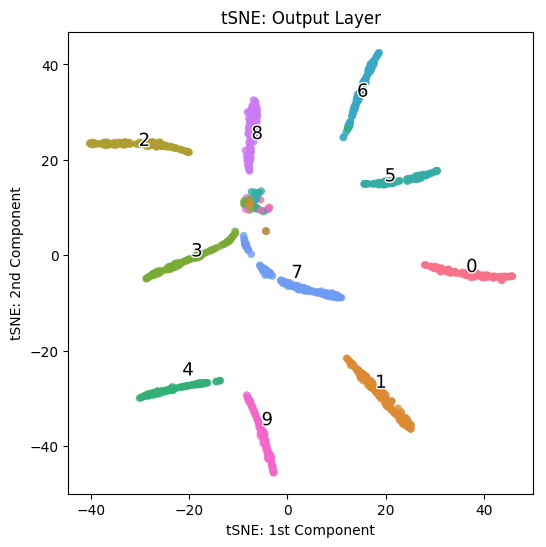

In [18]:
plot_class_layer_pca(outputlayer,"Output Layer")
plot_class_layer_tSNE(outputlayer,"Output Layer")

**Question:**

Explain your observation when repeated for all layers

**Observation:**

With every layer, the network is getting more signals about the difference in classes and is able to classify better.

tSNE does a better job of classificiation in comparison to PCA.

**Q2.6: Loading the audio slides**

In [0]:
s, sr=librosa.load("train_clean_male.wav", sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load("train_dirty_male.wav", sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

**Q2.7: Taking absolute of audio matrices**

In [0]:
X_abs=np.abs(X)
X_trans=np.transpose(X_abs)
S_abs=np.abs(S)
S_trans=np.transpose(S_abs)

**Setting up placeholders**

In [0]:
dirty_x = tf.placeholder(tf.float32,[None, 513])
clean_y = tf.placeholder(tf.float32,[None, 513])

**Training Model**

In [0]:
#weight_initializer = tf.contrib.layers.xavier_initializer()

with tf.variable_scope("other_charge", reuse=tf.AUTO_REUSE) as scope:
  weight1=tf.get_variable("w1",[513, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias1=tf.Variable(tf.zeros([1024]))

  weight2=tf.get_variable("w2",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias2=tf.Variable(tf.zeros([1024]))

  weight3=tf.get_variable("w3",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias3=tf.Variable(tf.zeros([1024]))

  weight4=tf.get_variable("w4",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias4=tf.Variable(tf.zeros([1024]))
  
  weight5=tf.get_variable("w5",[1024, 1024],initializer=tf.contrib.layers.xavier_initializer())
  bias5=tf.Variable(tf.zeros([1024]))

  weight6=tf.get_variable("w6",[1024, 513],initializer=tf.contrib.layers.xavier_initializer())
  bias6=tf.Variable(tf.zeros([513]))

  hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(dirty_x, weight1), bias1))
  hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, weight2), bias2))
  hidden_layer3 = tf.nn.relu(tf.add(tf.matmul(hidden_layer2, weight3), bias3))
  hidden_layer4 = tf.nn.relu(tf.add(tf.matmul(hidden_layer3, weight4), bias4))
  hidden_layer5 = tf.nn.relu(tf.add(tf.matmul(hidden_layer4, weight5), bias5))
  output_layer = tf.nn.relu(tf.add(tf.matmul(hidden_layer5, weight6), bias6))


  err = tf.reduce_mean(tf.square(clean_y - output_layer))#tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=clean_y,logits=output_layer))
  optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(err)
 
  rmse=tf.sqrt(tf.reduce_mean(tf.square(clean_y - output_layer)))


  num_epochs = 500
  batch_size = 156
 

**Loading test files**

In [0]:
test_1, sr_test_1=librosa.load("test_x_01.wav", sr=None)
Xtest_1=librosa.stft(test_1, n_fft=1024, hop_length=512)
Xtest_1_abs=np.abs(Xtest_1)
Xtest_1_trans=np.transpose(Xtest_1_abs)

test_2, sr_test_2=librosa.load("test_x_02.wav", sr=None)
Xtest_2=librosa.stft(test_2, n_fft=1024, hop_length=512)
Xtest_2_abs=np.abs(Xtest_2)
Xtest_2_trans=np.transpose(Xtest_2_abs)


**Loss in Epochs**

In [24]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())


  for iter in range(num_epochs):

    loss = 0
    rmse_calc=0
    
    i=0
    while(i<X_trans.shape[0]):
      start = i
      end = i+batch_size
      batch_x = X_trans[start:end]
      batch_y = S_trans[start:end]
      o,e,mean_err = sess.run([optimize,err,rmse], feed_dict={dirty_x: batch_x, clean_y: batch_y})
      loss+=e
      rmse_calc+=mean_err
      i+=batch_size
      #accuracy_batch=accuracy_batch/n_batch
    
    s="epoch num - "+ str(iter) +": Loss is - "+ str(round(loss,3))+" RMSE is - "+ str(round(rmse_calc,3))
    print(s)
  Stest_1_abs=sess.run(output_layer, feed_dict={dirty_x: Xtest_1_trans})
  Stest_2_abs=sess.run(output_layer, feed_dict={dirty_x: Xtest_2_trans})

    #print(sess.run(accuracy, feed_dict={train_x: mnist.test.images, train_y: mnist.test.labels}))


epoch num - 0: Loss is - 1.154 RMSE is - 4.074
epoch num - 1: Loss is - 0.778 RMSE is - 3.361
epoch num - 2: Loss is - 0.64 RMSE is - 3.055
epoch num - 3: Loss is - 0.675 RMSE is - 3.125
epoch num - 4: Loss is - 0.541 RMSE is - 2.822
epoch num - 5: Loss is - 0.507 RMSE is - 2.737
epoch num - 6: Loss is - 0.502 RMSE is - 2.724
epoch num - 7: Loss is - 0.465 RMSE is - 2.631
epoch num - 8: Loss is - 0.421 RMSE is - 2.485
epoch num - 9: Loss is - 0.371 RMSE is - 2.352
epoch num - 10: Loss is - 0.382 RMSE is - 2.368
epoch num - 11: Loss is - 0.397 RMSE is - 2.397
epoch num - 12: Loss is - 0.425 RMSE is - 2.471
epoch num - 13: Loss is - 0.377 RMSE is - 2.346
epoch num - 14: Loss is - 0.357 RMSE is - 2.283
epoch num - 15: Loss is - 0.358 RMSE is - 2.293
epoch num - 16: Loss is - 0.338 RMSE is - 2.233
epoch num - 17: Loss is - 0.366 RMSE is - 2.289
epoch num - 18: Loss is - 0.358 RMSE is - 2.296
epoch num - 19: Loss is - 0.296 RMSE is - 2.111
epoch num - 20: Loss is - 0.253 RMSE is - 1.951
epo

**Reconstructing 1st text file**

In [0]:
Stest_1 = np.multiply((Xtest_1/Xtest_1_abs),np.transpose(Stest_1_abs))
Stest_1_trans = librosa.istft(Stest_1, hop_length=512)
librosa.output.write_wav("test_s_01_recons2.wav", Stest_1_trans, sr_test_1)

**Reconstructing 2nd text file**

In [0]:
Stest_2 = np.multiply((Xtest_2/Xtest_2_abs),np.transpose(Stest_2_abs))
Stest_2_trans = librosa.istft(Stest_2, hop_length=512)
librosa.output.write_wav("test_s_02_recons.wav", Stest_2_trans, sr)

**Citations:**

Referred https://www.youtube.com/watch?v=BhpvH5DuVu8&list=PLSPWNkAMSvv5DKeSVDbEbUKSsK4Z-GgiP&index=3 for learning TensorFlow

Discussed with Shilpa Singh about Intializers